In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [2]:
def run(NL, NR, NIter, gamma, log):
    
    command = "./piston {0} {1} {2} {3} ".format(NL, NR, NIter, gamma)
    if(log == True):
        command = "./pistonlog {0} {1} {2} {3} ".format(NL, NR, NIter, gamma)
        
    p = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    a = p.stdout.readlines()
    
    observable = np.loadtxt("observables.dat")
    
    logdata = np.array([])
    if(log == True):
        logdata = np.loadtxt("log.dat")
    return a, observable, logdata


In [21]:
NL = 1000
NR = 1000
N = NL + NR
NIter = 10000
gamma = 0.01

output, obs, logdata = run(NL, NR, NIter, gamma, False)
ts = obs[:,0]
xm = obs[:,1]

In [32]:
NA = 100
EL = np.zeros((NIter,NA))
for i in range(NA):
    output, obs, logdata = run(NL, NR, NIter, gamma, False)
    EL[:,i] = obs[:,1]

In [33]:
soma = EL[:,0] * 0
for i in range(NA):
    soma += EL[:,i]
soma /= NA

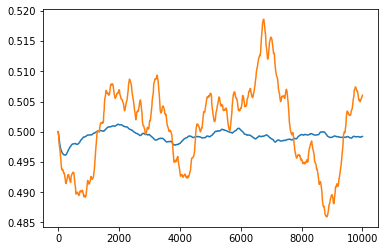

In [34]:
plt.plot(soma)
plt.plot(EL[:,0])

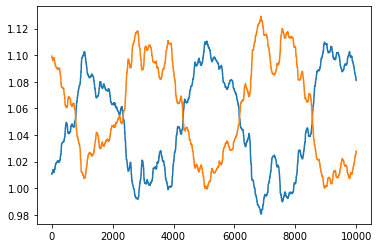

In [22]:
plt.plot(obs[:,2])
plt.plot(obs[:,3])

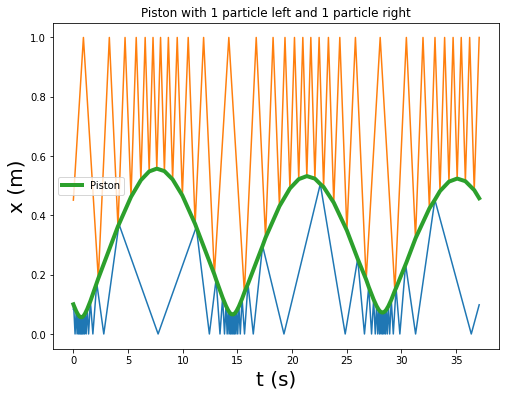

In [14]:
# Only run this cell if logdata exists
# If logdata exists, it will have every position of every particle
positions = np.zeros([NIter, N])
for i in range(N):
    positions[:,i] = logdata[:,3 + i*4]
    
fig, axs = plt.subplots(1,1)

axs.set_title("Piston with 1 particle left and 1 particle right")
axs.set_xlabel("t (s)", fontsize=20)
axs.set_ylabel("x (m)", fontsize=20)
fig.set_figheight(6)
fig.set_figwidth(8)
for i in range(N):
    axs.plot(ts,positions[:,i])
axs.plot(ts, xm, linewidth=4, label = "Piston")   
axs.legend()
plt.show()